# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [2]:
df= pd.read_csv("cereal.csv")

In [3]:
df.head(1)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973


In [4]:
df.shape

(77, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [6]:
df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [7]:
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [8]:
df.duplicated().any()

False

**No duplicates were found in the dataset. Next, we will generate histograms to identify any unusual outliers within our variables.**

In [9]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


# Visualization

<AxesSubplot:title={'center':'Overall Cereals Data Distribution'}, ylabel='Count'>

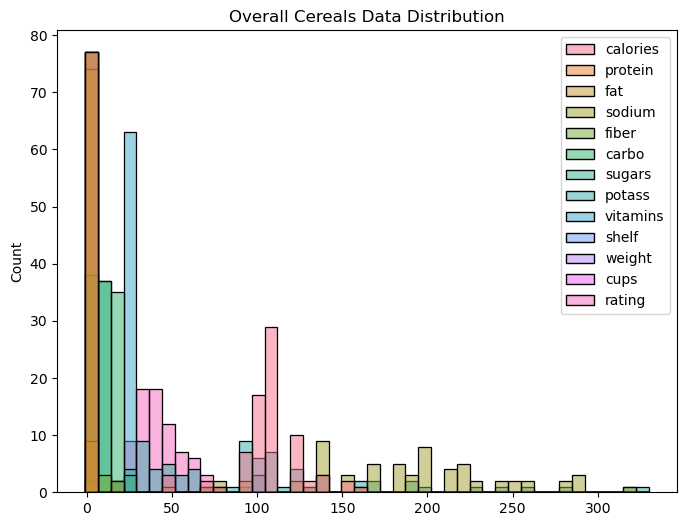

In [11]:
#Lets see the overall distribution of our data
plt.figure(figsize=(8,6))
plt.title("Overall Cereals Data Distribution") 
sns.histplot(data = df)

**Our data appears to be right-skewed, indicating a positive skew in the data distribution. In the following sections of our notebook, we will create histograms for each variable to gain a deeper understanding of our data**

In [13]:
# Let's create a function so that we don't need to retype everything each plot
def plot_histogram(column_data, column_name): 
    plt.figure(figsize=(5, 3)) 
    plt.title(f"Distribution of {column_name}") 
    sns.histplot(column_data, kde=True) 
    plt.show()

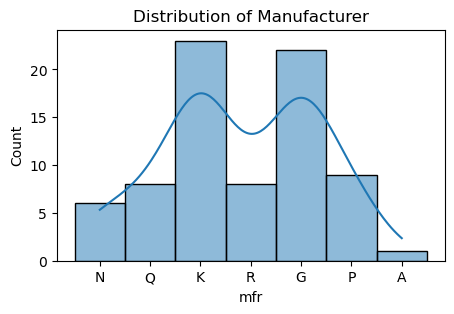

In [14]:
plot_histogram(df['mfr'], 'Manufacturer')

**The histogram reveals that Kellogs and General Mills are the primary cereal manufacturers in our dataset. This bimodal distribution indicates two prominent peaks, highlighting the dominance of these two manufacturers in our product range.**


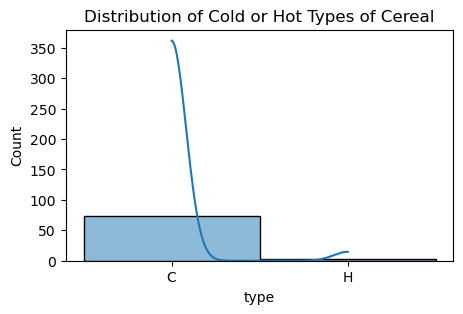

In [16]:
plot_histogram(df['type'], 'Cold or Hot Types of Cereal')

**Our analysis suggests that the majority of our cereals are designed to be served cold, with fewer options suitable for hot consumption.**

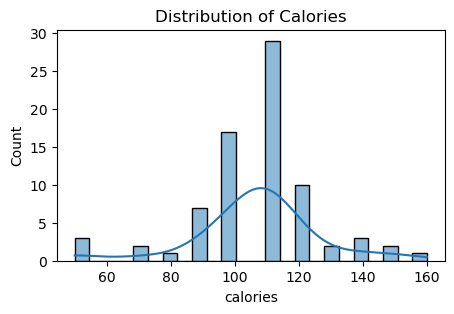

In [17]:
plot_histogram(df['calories'], 'Calories')

**The distribution of calories in our dataset exhibits a normal distribution, characterized by a bell-shaped curve. Most cereals in our dataset provide around 100-120 calories per serving.**

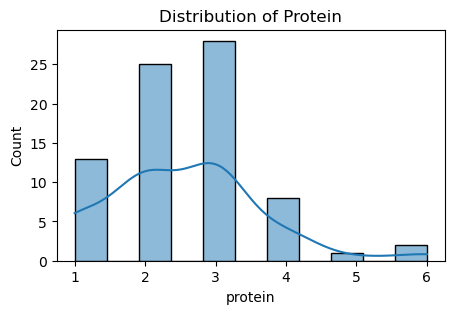

In [18]:
plot_histogram(df['protein'], 'Protein')

**The distribution of protein content among our products predominantly falls within the range of 2-3 grams, as indicated by our right-skewed histogram.**

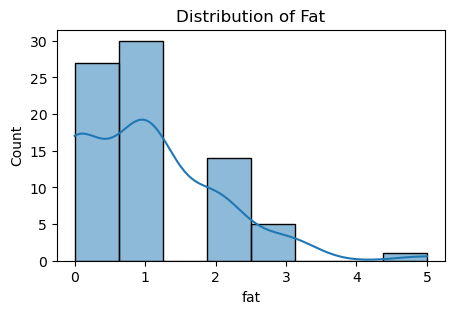

In [19]:
plot_histogram(df['fat'], 'Fat')

**The distribution of fat content per gram also exhibits a right-skewed pattern, with the majority of servings containing 0-1 gram. Some cereals have up to 5 grams of fat per serving, which, although slightly higher, does not qualify as an extreme outlier and does not significantly impact our analysis.**

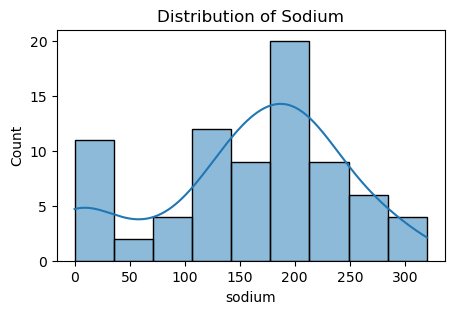

In [20]:
plot_histogram(df['sodium'], 'Sodium')

**For the contents of sodium, we can observe a normal distribution of our data, showing that 150-250 milligrams of servings for our cereals.**

# Presenting and Showing Visualizations

**For this cereal dataset, let's create some questions that we might want to answer using visualizations to make it easier for us to convey our findings to the stakeholders**

Which brand has the most highest ratings?

Are there any relationships between sugar content and rating?

Is there a relationship between fat content and calories?

What are the most influential factors or features that contribute to the ratings of cereals in the Cereals80 dataset?


# Which brand has the most highest ratings?

<AxesSubplot:title={'center':'Brands and Their Ratings'}, xlabel='name', ylabel='rating'>

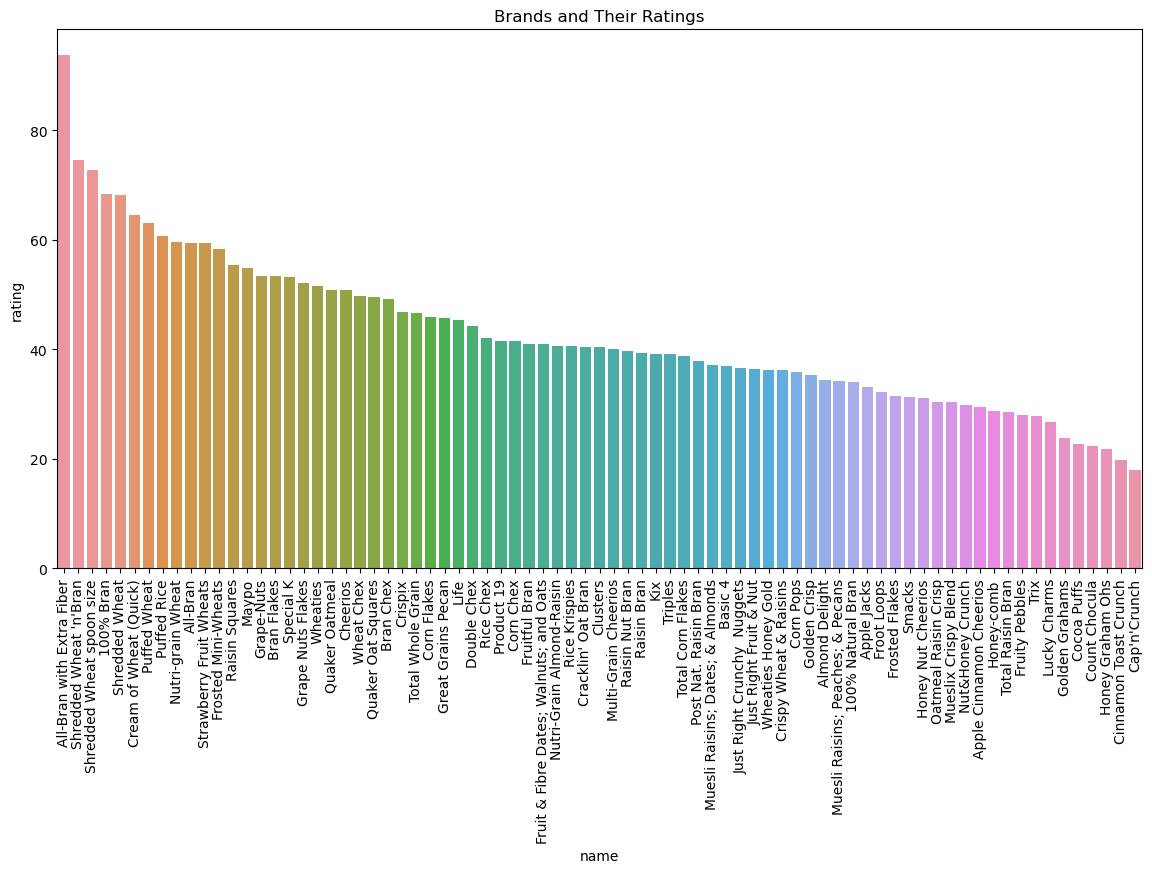

In [22]:
# Sort the DataFrame by rating in descending order
cereals_sorted = df.sort_values(by='rating', ascending=False)

plt.figure(figsize=(14, 7))
plt.title("Brands and Their Ratings")
plt.xticks(rotation=90)
sns.barplot(data=cereals_sorted, x=cereals_sorted['name'], y=cereals_sorted['rating'])

### Are there any relationships between sugar content and rating?

<AxesSubplot:title={'center':'Relationship between Sugar Content and Rating'}, xlabel='sugars', ylabel='rating'>

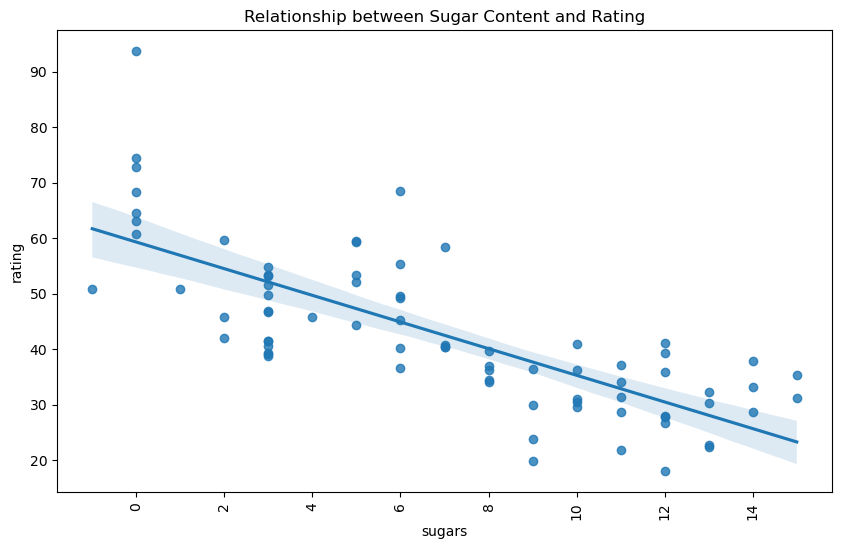

In [24]:
plt.figure(figsize=(10, 6))
plt.title('Relationship between Sugar Content and Rating') 
plt.xticks(rotation=90)
sns.regplot(data=df, x=df['sugars'], y=df['rating'])

### Is there a relationship between fat content and calories?

<AxesSubplot:title={'center':'Relationship between Sugar Content and Rating'}, xlabel='fat', ylabel='rating'>

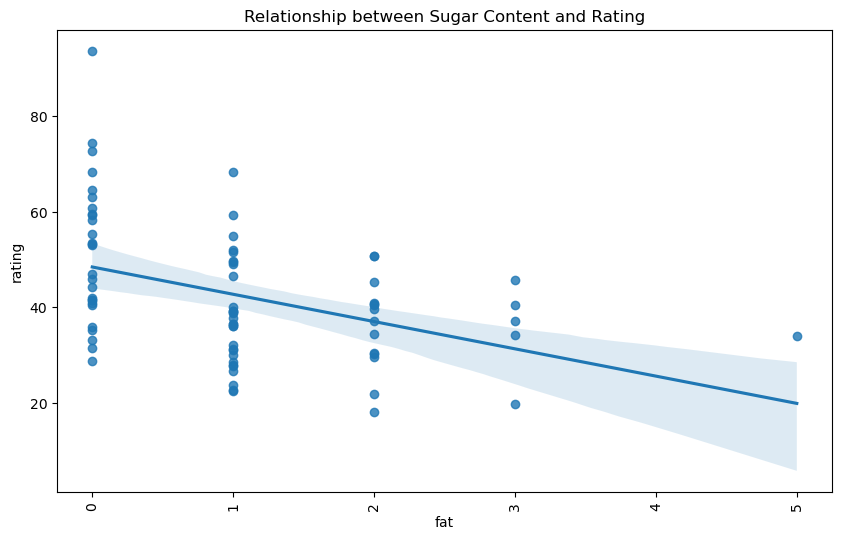

In [25]:
plt.figure(figsize=(10, 6))
plt.title('Relationship between Sugar Content and Rating') 
plt.xticks(rotation=90)
sns.regplot(data=df, x=df['fat'], y=df['rating'])

### Using the Random Forests to check for Feature Importance

In [27]:
#Let's drop non numerical features for our X variable
X = df.drop(columns=['name', 'type', 'mfr', 'rating','shelf', 'cups', 'weight']) 
y = df['rating']

#Fit our model
model = RandomForestRegressor() 
model.fit(X, y)

#Assign our important features for visualization
feature_importances = model.feature_importances_

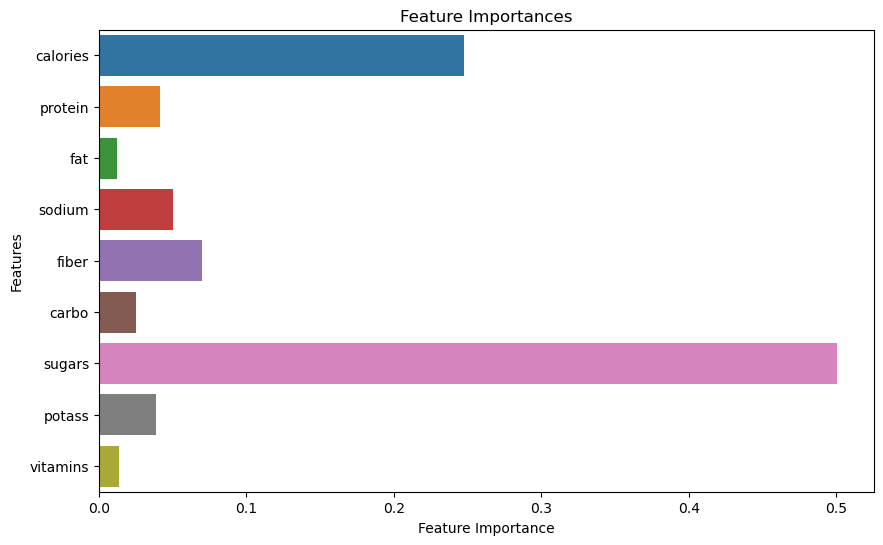

In [28]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x=feature_importances, y=X.columns) 
plt.xlabel("Feature Importance") 
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()